In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def load_data():
  data = pd.read_excel('/content/Data Skripsi fix.xlsx')

  return data

In [3]:
tweet_df = load_data()

In [4]:
tweet_df.head()

,created_at,full_text,username,Kategori
0,Tue Oct 03 01:22:55 +0000 2023,Timnas Indonesia U-17 yang dipersiapkan untuk ...,heralddotID,Netral
1,Tue Oct 03 00:57:07 +0000 2023,"Apa cuma gue yg baru tau, segitu concernnya Pa...",NayDonuts,Positif
2,Mon Oct 02 23:31:06 +0000 2023,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,VIVAbola,Netral
3,Mon Oct 02 21:53:15 +0000 2023,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",kabarlhk,Netral
4,Mon Oct 02 18:30:38 +0000 2023,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,thejatimcom,Netral


In [5]:
df = pd.DataFrame(tweet_df[['Kategori','full_text']])

In [6]:
df['Kategori'] = df['Kategori'].astype('category')

In [7]:
df['Kategori'].value_counts()

Kategori
Netral     1167
Positif     695
Negatif     182
Name: count, dtype: int64

Text(0.5, 1.0, 'Dataset Asli dan Labeling')

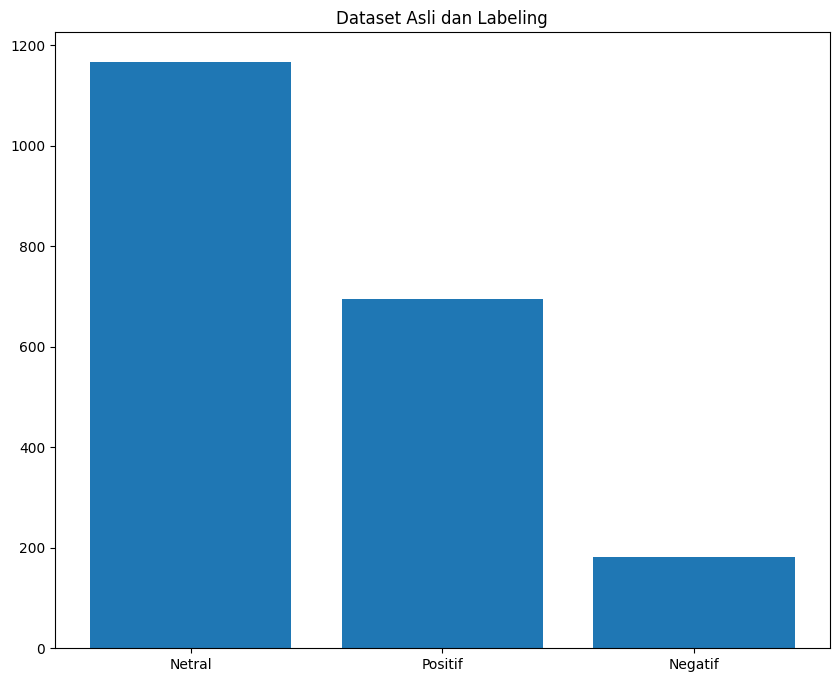

In [8]:
label_cnt = Counter(df['Kategori'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset Asli dan Labeling")

In [9]:
X = df.drop(['Kategori'], axis=1)
y = df['Kategori']

In [10]:
X=df
Y=df['Kategori']

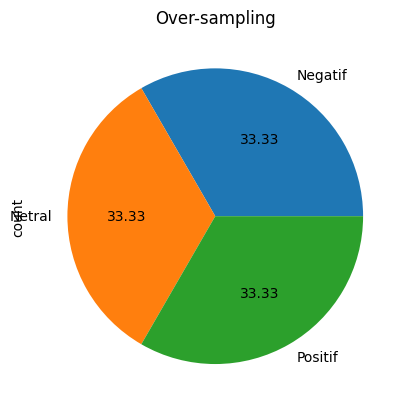

In [11]:
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")


# from imblearn.under_sampling import RandomUnderSampler

# # rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(random_state=0) # String
# X_res, y_res = rus.fit_resample(X,Y)

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [12]:
# Class distribution
y_res.value_counts()

Kategori
Negatif    1167
Netral     1167
Positif    1167
Name: count, dtype: int64

In [13]:
df = X_res

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['full_text'].values.astype('U'))
bow_transformer.vocabulary_

{'timnas': 5626,
 'indonesia': 2186,
 '17': 24,
 'yang': 6003,
 'dipersiapkan': 1423,
 'untuk': 5819,
 'piala': 4413,
 'dunia': 1585,
 'meraih': 3636,
 'kemenangan': 2666,
 'atas': 406,
 'sc': 4839,
 'paderborn': 4032,
 'youth': 6021,
 'dan': 1169,
 '19': 33,
 'di': 1244,
 'laga': 2975,
 'uji': 5794,
 'coba': 1094,
 'kedua': 2599,
 'senin': 4978,
 '10': 8,
 '2023': 50,
 'apa': 324,
 'cuma': 1139,
 'gue': 1965,
 'yg': 6010,
 'baru': 549,
 'tau': 5398,
 'segitu': 4897,
 'concernnya': 1112,
 'pak': 4038,
 'prabowo': 4511,
 'sama': 4780,
 'persepakbolaan': 4357,
 'kita': 2810,
 'punya': 4583,
 'harapan': 2020,
 'semoga': 4961,
 'tempaan': 5446,
 'fisik': 1745,
 'mental': 3580,
 'aspire': 393,
 'academy': 132,
 'qatar': 4594,
 'menjadikan': 3563,
 'tim': 5622,
 'sebagai': 4857,
 'pesepakbola': 4396,
 'terbaik': 5478,
 'akan': 192,
 'membawa': 3345,
 'berlaga': 723,
 'tiket': 5616,
 'rp75': 4726,
 'ribu': 4701,
 'ini': 2221,
 'cara': 1008,
 'belinya': 614,
 'sambut': 4792,
 'badak': 464,
 's

In [15]:
text_bow = bow_transformer.transform(df['full_text'].values.astype('U'))
print(text_bow)

  (0, 8)	1
  (0, 24)	2
  (0, 33)	1
  (0, 50)	1
  (0, 406)	1
  (0, 1094)	1
  (0, 1169)	1
  (0, 1244)	1
  (0, 1423)	1
  (0, 1585)	1
  (0, 2186)	1
  (0, 2599)	1
  (0, 2666)	1
  (0, 2975)	1
  (0, 3636)	1
  (0, 4032)	1
  (0, 4413)	1
  (0, 4839)	1
  (0, 4978)	1
  (0, 5626)	1
  (0, 5794)	1
  (0, 5819)	1
  (0, 6003)	1
  (0, 6021)	1
  (1, 24)	1
  :	:
  (3498, 5021)	1
  (3498, 5135)	1
  (3498, 5234)	1
  (3498, 5626)	1
  (3498, 5681)	1
  (3498, 5955)	1
  (3499, 24)	1
  (3499, 873)	1
  (3499, 1585)	1
  (3499, 2720)	1
  (3499, 4083)	1
  (3499, 4242)	1
  (3499, 4413)	1
  (3499, 4434)	1
  (3499, 4950)	1
  (3499, 4961)	1
  (3499, 4990)	1
  (3499, 5561)	1
  (3499, 5622)	1
  (3499, 5819)	1
  (3500, 185)	1
  (3500, 1916)	1
  (3500, 2134)	1
  (3500, 3049)	1
  (3500, 5626)	1


In [16]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(3501, 6065)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 6021)	0.30769419523763153
  (0, 6003)	0.1140059261259897
  (0, 5819)	0.12427081515522918
  (0, 5794)	0.2855469198238428
  (0, 5626)	0.05855363676390747
  (0, 4978)	0.24602928382099415
  (0, 4839)	0.3351260901932537
  (0, 4413)	0.059871407260494336
  (0, 4032)	0.3351260901932537
  (0, 3636)	0.21756938668283432
  (0, 2975)	0.14874238786272495
  (0, 2666)	0.20618412159997293
  (0, 2599)	0.19986662149546444
  (0, 2186)	0.08226004292007649
  (0, 1585)	0.05960806882527321
  (0, 1423)	0.3190794603204929
  (0, 1244)	0.07765409875093336
  (0, 1169)	0.11290957183869846
  (0, 1094)	0.2481690405364877
  (0, 406)	0.2146365000398376
  (0, 50)	0.09584295028010069
  (0, 33)	0.24602928382099415
  (0, 24)	0.10017864891578768
  (0, 8)	0.18150986934573676
  (1, 6010)	0.27670785419127614
  :	:
  (3498, 960)	0.13999502972461766
  (3498, 941)	0.13061329234879557
  (3498, 583)	0.2213275352183162
  (3498, 489)	0.2213275352183162
  (3498, 330)	0.1537131303954086
  (3498, 24)	0.038012135

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2,
random_state=35)

In [19]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(x_train,y_train)

In [20]:
prediction = model.predict(x_test)

predict= pd.Series(prediction)

print(predict.to_string())

0      Positif
1       Netral
2       Netral
3      Positif
4       Netral
5      Positif
6      Positif
7      Negatif
8       Netral
9      Negatif
10      Netral
11     Negatif
12     Positif
13     Negatif
14     Positif
15     Negatif
16     Negatif
17     Positif
18     Negatif
19     Negatif
20     Negatif
21     Positif
22     Negatif
23      Netral
24     Positif
25      Netral
26      Netral
27     Positif
28     Negatif
29      Netral
30     Positif
31      Netral
32     Positif
33     Negatif
34      Netral
35      Netral
36     Negatif
37      Netral
38     Negatif
39     Positif
40      Netral
41     Positif
42     Positif
43     Positif
44     Negatif
45      Netral
46      Netral
47     Negatif
48     Positif
49     Negatif
50      Netral
51     Negatif
52      Netral
53      Netral
54      Netral
55     Positif
56     Positif
57     Positif
58     Negatif
59     Positif
60     Negatif
61     Negatif
62      Netral
63      Netral
64     Positif
65      Netral
66     Pos

In [21]:
true_label= pd.Series(y_test)
print(true_label.to_string())

1038    Positif
1368     Netral
735     Positif
385      Netral
1279     Netral
326     Positif
452     Positif
2576    Negatif
1658     Netral
1383     Netral
1046     Netral
2715    Negatif
219      Netral
2776    Negatif
574     Positif
2287    Negatif
2953    Negatif
3271    Positif
1546    Negatif
2076    Negatif
2955    Negatif
3147    Positif
2126    Negatif
2203    Negatif
3285    Positif
1158     Netral
757     Positif
175     Positif
68      Negatif
157     Positif
703      Netral
1289    Positif
825      Netral
2269    Negatif
918     Positif
3240    Positif
2741    Negatif
1066     Netral
2470    Negatif
3139    Positif
2449    Negatif
2099    Negatif
3289    Positif
3165    Positif
2342    Negatif
1743     Netral
1861     Netral
2121    Negatif
1271    Positif
2301    Negatif
903      Netral
2760    Negatif
1488     Netral
282      Netral
1678     Netral
709     Positif
3236    Positif
3434    Positif
2379    Negatif
257     Positif
1458    Negatif
2475    Negatif
544     

In [22]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pandas import DataFrame



test time:  0.067s
accuracy:   0.779
              precision    recall  f1-score   support

    Negative       0.83      0.84      0.84       222
      Netral       0.76      0.71      0.74       234
    Positive       0.75      0.78      0.76       245

    accuracy                           0.78       701
   macro avg       0.78      0.78      0.78       701
weighted avg       0.78      0.78      0.78       701



Text(0.5, 23.52222222222222, 'Label prediksi')

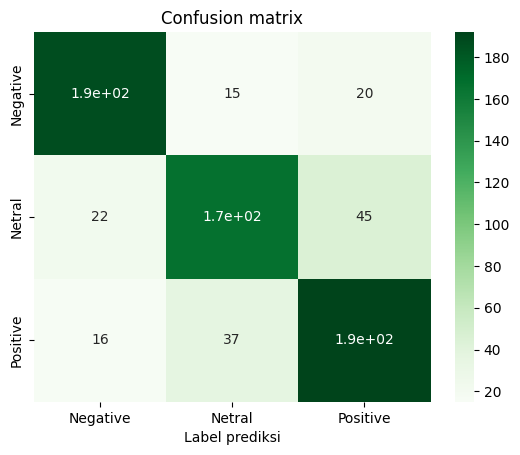

In [23]:

t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Netral', 'Positive']))

columns = ['Negative','Netral','Positive']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:

print(scores)

# Print the mean accuracy of all 10 folds

print(scores.mean())

[0.71785714 0.75714286 0.76071429 0.71071429 0.73214286 0.68928571
 0.72857143 0.7        0.76785714 0.74642857]
0.7310714285714285
